In [1]:
from qiskit import __version__
print(__version__)

/var/folders/p8/wytng6t53dl_gcrnlz01_zn00000gn/T/ipykernel_84371/1390138350.py:1: DeprecationWarning: Using Qiskit with Python 3.9 is deprecated as of the 2.1.0 release. Support for running Qiskit with Python 3.9 will be removed in the 2.3.0 release, which coincides with when Python 3.9 goes end of life.
  from qiskit import __version__


2.1.1


Vectors and matrices in Python

Qiskit uses the Python programming language, so before discussing Qiskit specifically, it may be helpful to some to very briefly discuss matrix and vector computations in Python.

In Python, matrix and vector computations can be performed using the
class from the library, which provides functionality for many numerical and scientific computations. The following code loads this library, defines two column vectors, and , corresponding to the qubit state vectors ∣0⟩∣0⟩ and ∣1⟩,∣1⟩, and then prints their average.

In [2]:
import numpy as np

ket0 = np.array([[1],[0]])
ket1 = np.array([[0],[1]])

print(ket0 / 2 + ket1 / 2)

[[0.5]
 [0.5]]


In [3]:
M1 = np.array([[1, 1], [0, 0]])
M2 = np.array([[1, 0], [0, 1]])
M = M1 / 2 + M2 / 2
print(M)

[[1.  0.5]
 [0.  0.5]]


In [4]:
from qiskit.visualization import array_to_latex

display(array_to_latex(np.matmul(M1, ket1)))
display(array_to_latex(np.matmul(M1, M2)))
display(array_to_latex(np.matmul(M, M)))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

## States, measurements, and operations

Qiskit includes several classes that allow for states, measurements, and operations to be created and manipulated — so starting from scratch and programming everything needed to simulate quantum states, measurements, and operations in Python is not required. Some examples to help you to get started are included below.

#### Defining and displaying state vectors

Qiskit's
class provides functionality for defining and manipulating quantum state vectors. In the code that follows, the class is imported and a few vectors are defined. (We're also importing the function from the library to compute a square root. This function could, alternatively, be called as provided that has already been imported, as it has above; this is just a different way to import and use this specific function alone.)

In [5]:
from qiskit.quantum_info import Statevector
from numpy import sqrt

u = Statevector([1 / sqrt(2), 1 / sqrt(2)])
v = Statevector([(1 + 2.0j) / 3, -2 / 3])
w = Statevector([1 / 3, 2 / 3])

display(u.draw("text"))
display(u.draw("latex"))
print(u.draw("latex_source"))

display(u.is_valid())
display(w.is_valid())

display(v.draw("latex"))

outcome, state = v.measure()
print(f"Measured: {outcome}\nPost-measurement state:")
display(state.draw("latex"))

"""
Looking at this measurement simulation, the key thing to understand is what happens during a quantum measurement:
Before measurement: |ψ⟩ = (1+2i)/3|0⟩ - 2/3|1⟩
During measurement: The Born rule determines probabilities:

Pr(outcome = 0) = |(1+2i)/3|² = 5/9
Pr(outcome = 1) = |-2/3|² = 4/9

After measurement: The quantum state "collapses" to whatever was measured.
In this case, the measurement outcome was 1, so the post-measurement state becomes |1⟩. But why the minus sign?
The minus sign comes from preserving the original phase of the coefficient that was measured. In the original state, the coefficient of |1⟩ was -2/3 (negative). When the measurement collapses to |1⟩, Qiskit preserves this sign information.
So the post-measurement state is:

−|1⟩ (not +|1⟩)

This maintains the phase relationship from the original state. The magnitude doesn't matter anymore (since we know with certainty we're in state |1⟩), but the phase/sign can be preserved.
Note: Different quantum simulators might handle this differently - some might just return +|1⟩ since the global phase doesn't affect measurement probabilities. But Qiskit chooses to preserve the original coefficient's sign.
"""

[0.70710678+0.j,0.70710678+0.j]

<IPython.core.display.Latex object>

\frac{\sqrt{2}}{2} |0\rangle+\frac{\sqrt{2}}{2} |1\rangle


True

False

<IPython.core.display.Latex object>

Measured: 0
Post-measurement state:


<IPython.core.display.Latex object>

'\nLooking at this measurement simulation, the key thing to understand is what happens during a quantum measurement:\nBefore measurement: |ψ⟩ = (1+2i)/3|0⟩ - 2/3|1⟩\nDuring measurement: The Born rule determines probabilities:\n\nPr(outcome = 0) = |(1+2i)/3|² = 5/9\nPr(outcome = 1) = |-2/3|² = 4/9\n\nAfter measurement: The quantum state "collapses" to whatever was measured.\nIn this case, the measurement outcome was 1, so the post-measurement state becomes |1⟩. But why the minus sign?\nThe minus sign comes from preserving the original phase of the coefficient that was measured. In the original state, the coefficient of |1⟩ was -2/3 (negative). When the measurement collapses to |1⟩, Qiskit preserves this sign information.\nSo the post-measurement state is:\n\n−|1⟩ (not +|1⟩)\n\nThis maintains the phase relationship from the original state. The magnitude doesn\'t matter anymore (since we know with certainty we\'re in state |1⟩), but the phase/sign can be preserved.\nNote: Different quantu

In [6]:
from qiskit.quantum_info import Operator

Y = Operator([[0, -1.0j], [1.0j, 0]])
H = Operator([[1 / sqrt(2), 1 / sqrt(2)], [1 / sqrt(2), -1 / sqrt(2)]])
S = Operator([[1, 0], [0, 1.0j]])
T = Operator([[1, 0], [0, (1 + 1.0j) / sqrt(2)]])

display(T.draw("latex"))

<IPython.core.display.Latex object>

In [7]:
v = Statevector([1, 0])

v = v.evolve(H)
v = v.evolve(T)
v = v.evolve(H)
v = v.evolve(S)
v = v.evolve(Y)

display(v.draw("latex"))

<IPython.core.display.Latex object>

## Quantum circuit

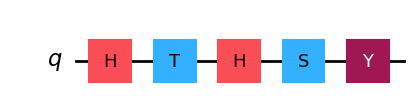

In [8]:
from qiskit import QuantumCircuit

circuit = QuantumCircuit(1) # Creates a quantum circuit with 1 qubit

circuit.h(0)
circuit.t(0)
circuit.h(0)
circuit.s(0)
circuit.y(0)

display(circuit.draw(output="mpl"))

In [9]:
ket0 = Statevector([1, 0])
v = ket0.evolve(circuit)
display(v.draw("latex"))

<IPython.core.display.Latex object>

## Multiple system

In [10]:
from qiskit.quantum_info import Statevector, Operator
from numpy import sqrt

#### Tensor product

In [11]:
zero = Statevector.from_label("0")
one = Statevector.from_label("1")
psi = zero.tensor(one)


display(psi.draw("latex"))

<IPython.core.display.Latex object>

## Teleportation

In [13]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram, array_to_latex
from qiskit.circuit.library import UGate
from numpy import pi, random

📍 Initial State:


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

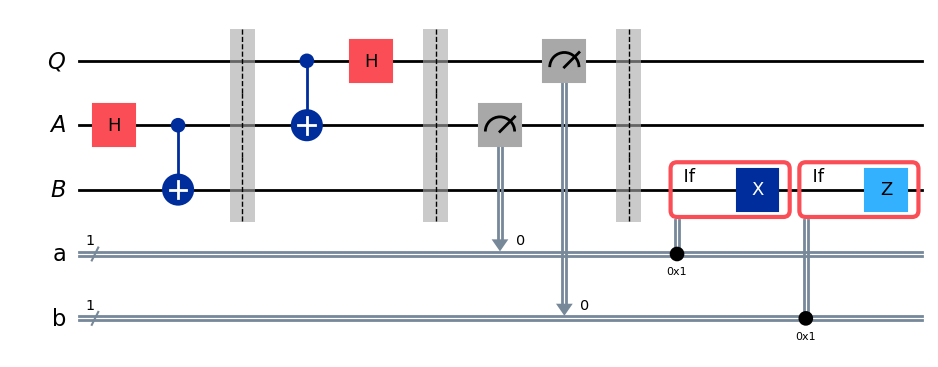

In [14]:
qubit = QuantumRegister(1, "Q")     # Create a container that holds 1 physical qubit, and label it 'Q', start with ​∣0⟩
ebit0 = QuantumRegister(1, "A")
ebit1 = QuantumRegister(1, "B")
a = ClassicalRegister(1, "a")
b = ClassicalRegister(1, "b")

protocol = QuantumCircuit(qubit, ebit0, ebit1, a, b)
# Show initial state |000⟩
print("📍 Initial State:")
state = Statevector.from_instruction(protocol)
display(state.draw("latex"))
# print(f"Coefficients: {state.data}") # Coefficients: [1.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j] which mean 1 * |000⟩ + 0 * |001⟩ + ....

# Prepare ebit used for teleportation
protocol.h(ebit0)
state = Statevector.from_instruction(protocol)
display(state.draw("latex"))
protocol.cx(ebit0, ebit1)
state = Statevector.from_instruction(protocol)
display(state.draw("latex"))
protocol.barrier()

# Alice's operations
protocol.cx(qubit, ebit0)
state = Statevector.from_instruction(protocol)
display(state.draw("latex"))
protocol.h(qubit)
state = Statevector.from_instruction(protocol)
display(state.draw("latex"))
protocol.barrier()

# Alice measures and sends classical bits to Bob
protocol.measure(ebit0, a)
protocol.measure(qubit, b)
protocol.barrier()

# Bob uses the classical bits to conditionally apply gates
with protocol.if_test((a, 1)):
    protocol.x(ebit1)
with protocol.if_test((b, 1)):
    protocol.z(ebit1)

display(protocol.draw(output="mpl"))

In [15]:
random_gate = UGate(
    theta=random.random() * 2 * pi,
    phi=random.random() * 2 * pi,
    lam=random.random() * 2 * pi
)

display(array_to_latex(random_gate.to_matrix()))

<IPython.core.display.Latex object>

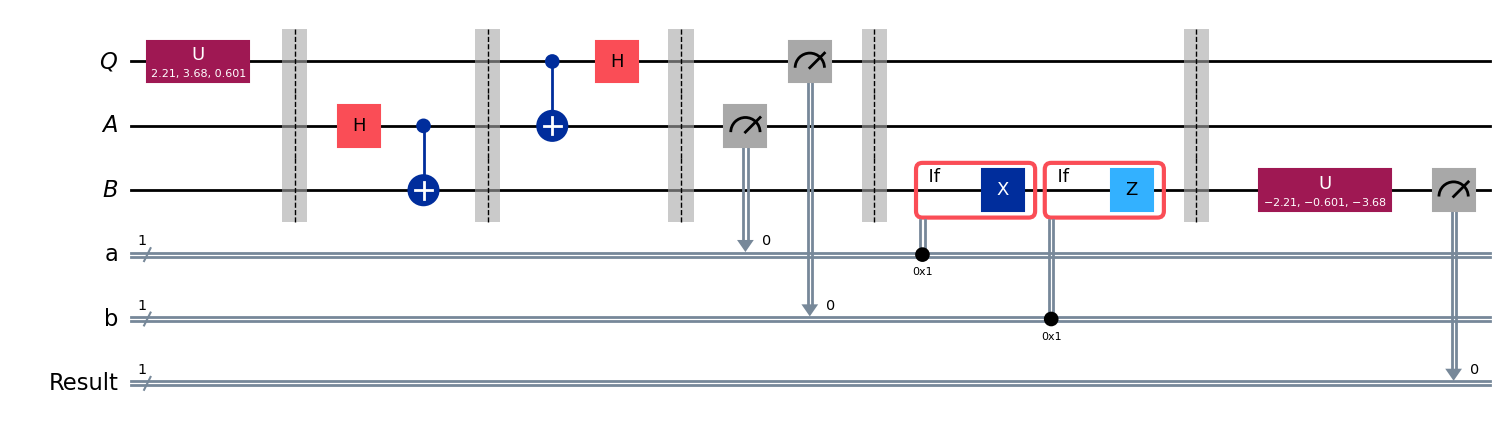

In [16]:
# Create a new circuit including the same bits and qubits used in the
# teleportation protocol.

test = QuantumCircuit(qubit, ebit0, ebit1, a, b)

# Start with the randomly selected gate on Q

test.append(random_gate, qubit)
test.barrier()

# Append the entire teleportation protocol from above.

test = test.compose(protocol)
test.barrier()

# Finally, apply the inverse of the random unitary to B and measure.

test.append(random_gate.inverse(), ebit1)
result = ClassicalRegister(1, "Result")
test.add_register(result)
test.measure(ebit1, result)

display(test.draw(output="mpl"))